Chapter 09

# 经济型QR分解
《线性代数》 | 鸢尾花书：数学不难

这段代码完整地展示了**经济型 QR 分解（Economy QR Decomposition）**的数学结构和正交矩阵 $Q$ 的基本性质，并通过热图可视化了整个过程，帮助建立直观理解。

---

我们首先生成一个 $12 \times 8$ 的随机实矩阵 $A$，即：
$$
A \in \mathbb{R}^{12 \times 8}
$$
矩阵 $A$ 的列数小于行数，通常被称为“瘦矩阵”或“高瘦矩阵”。随后，进行经济型 QR 分解：
$$
A = QR
$$
其中：

- $Q \in \mathbb{R}^{12 \times 8}$ 是一个列向量两两正交且范数为 $1$ 的**正交矩阵的一部分**，即 $Q$ 的列向量满足
  $$
  Q^\top Q = I_8
  $$
  它的每一列构成 $A$ 的列空间的一个正交基。

- $R \in \mathbb{R}^{8 \times 8}$ 是一个**上三角矩阵**，它记录了将原始列向量投影到正交基上的系数。

这种分解方式保留了必要的信息（因为 $A$ 的秩至多为 $8$），同时节省了存储空间——$Q$ 并不是 $12 \times 12$ 的完整正交矩阵，而是只保留了 $A$ 列空间所需的 $8$ 列。

---

随后，代码通过热图展示以下矩阵结构：

1. 矩阵 $A$ 的热图；
2. 正交矩阵 $Q$ 的热图；
3. 上三角矩阵 $R$ 的热图；
4. 利用等式 $A = Q @ R$ 展示三者的分解关系。

通过颜色分布我们可以直观观察到：

- $R$ 的下三角区域接近全零；
- $Q$ 的列结构均衡、对称，符合正交性特征；
- $A$ 本身的列结构在 $Q$ 的基础上被重新编码为 $R$ 的列系数。

---

接下来，为了验证 $Q$ 的正交性，代码分别绘制了：
$$
Q^\top Q = I, \quad QQ^\top \neq I
$$

从数学角度，这说明：

- $Q^\top Q = I_8$ 成立，因为 $Q$ 的列向量是单位正交的；
- $QQ^\top$ 是一个 $12 \times 12$ 的**投影矩阵**，其作用是将任意向量投影到 $A$ 的列空间；
- 所以：
  $$
  QQ^\top \neq I_{12}
  $$
  但 $QQ^\top$ 是一个**幂等矩阵**，即满足：
  $$
  (QQ^\top)^2 = QQ^\top
  $$

这正体现了**经济型 QR 分解与完全型 QR 分解的区别**：前者只提供构造 $A$ 所需的最小维度正交基，而后者扩展为方阵，使得 $Q$ 是真正意义上的正交矩阵（满足 $QQ^\top = I$ 且 $Q^\top Q = I$）。

---

整体来看，这段代码从数学角度展示了：

- 如何对一个矩阵 $A \in \mathbb{R}^{m \times n}$ ($m > n$) 执行经济型 QR 分解；
- 正交矩阵的核心性质 $Q^\top Q = I$；
- 投影矩阵 $QQ^\top$ 在几何上的含义；
- 可视化角度如何辅助理解矩阵结构与运算效果。

## 初始化

In [4]:
import numpy as np  # 导入数值计算库
import seaborn as sns  # 导入数据可视化库
from matplotlib import pyplot as plt  # 导入绘图库

## 生成矩阵A

In [6]:
np.random.seed(88888)
A = np.random.randn(12, 8)

## 经济型QR分解

In [8]:
Q, R = np.linalg.qr(A)

## 可视化

Text(0.5, 1.0, 'R')

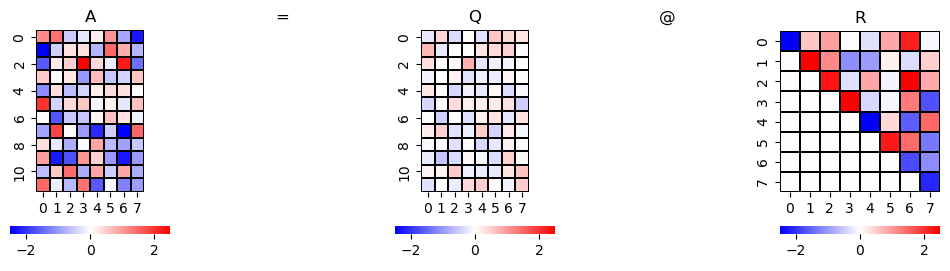

In [10]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(A, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制矩阵 X 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('A')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(Q, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制完整正交矩阵 Qc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Q')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(R, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制上三角矩阵 Rc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('R')

## Q为正交矩阵

Text(0.5, 1.0, 'Q')

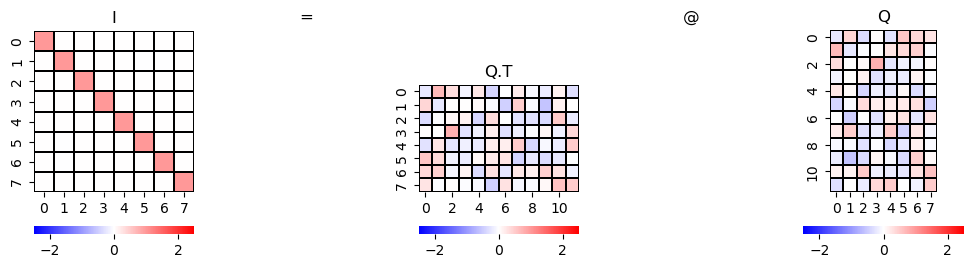

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(Q.T @ Q, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc.T @ Qc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('I')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(Q.T, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc.T 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Q.T')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(Q, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Q')

Text(0.5, 1.0, 'Q.T')

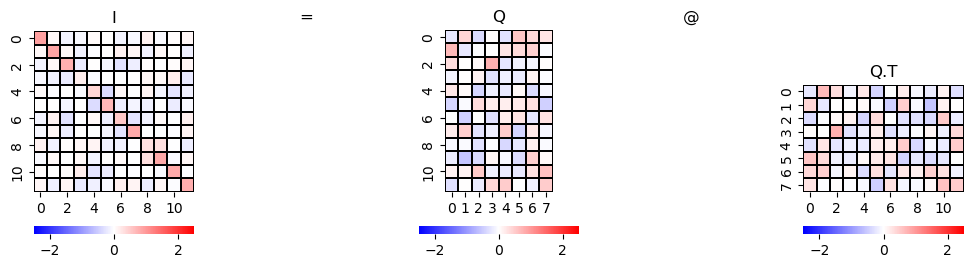

In [13]:
fig, axs = plt.subplots(1, 5, figsize=(12, 3))  # 创建子图

plt.sca(axs[0])
ax = sns.heatmap(Q @ Q.T, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc.T @ Qc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('I')

plt.sca(axs[1])
plt.title('=')  # 绘制等号
plt.axis('off')

plt.sca(axs[2])
ax = sns.heatmap(Q, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc.T 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Q')

plt.sca(axs[3])
plt.title('@')  # 绘制乘号
plt.axis('off')

plt.sca(axs[4])
ax = sns.heatmap(Q.T, cmap='bwr', vmax=2.5, vmin=-2.5,  # 绘制 Qc 的热图
                 linecolor = 'k',linewidths = 0.1,
                 cbar_kws={"orientation": "horizontal"})
ax.set_aspect("equal")
plt.title('Q.T')

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  